# STAT3612 Lecture 8 - Tree-based Methods

[Dr. Aijun Zhang](http://www.statsoft.org) - [STAT3612 Data Mining](http://www.statsoft.org/teaching/stat3612/)

28 March 2019

# Decision Trees

### 1. Piecewise Constant Modeling


In [1]:
import numpy as np 

np.random.seed(42)
m = 100
X = np.linspace(0,1,m).reshape(-1,1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

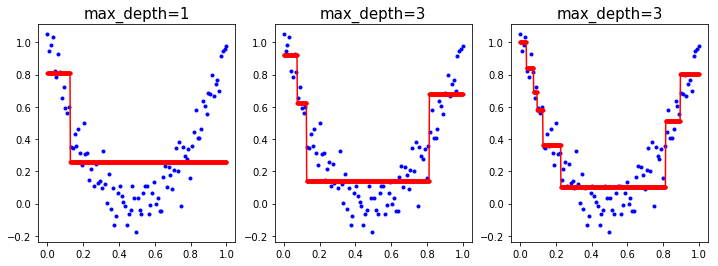

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(max_depth=1, random_state=999).fit(X, y)
tree_reg2 = DecisionTreeRegressor(max_depth=2, random_state=999).fit(X, y)
tree_reg3 = DecisionTreeRegressor(max_depth=3, random_state=999).fit(X, y)

x1 = np.linspace(0,1,500).reshape(-1, 1)
    
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.plot(X, y, "b.")
plt.plot(x1, tree_reg1.predict(x1), "r.-")
plt.title("max_depth=1",fontsize=15)

plt.subplot(132)
plt.plot(X, y, "b.")
plt.plot(x1, tree_reg2.predict(x1), "r.-")
plt.title("max_depth=3",fontsize=15)

plt.subplot(133)
plt.plot(X, y, "b.")
plt.plot(x1, tree_reg3.predict(x1), "r.-")
plt.title("max_depth=3",fontsize=15)

plt.show()

In [3]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz

iris = load_iris()
X = iris.data[:, 0:2] # Sepal length and width
y = iris.data[:,3]

tree_reg = DecisionTreeRegressor(max_depth=2).fit(X, y)


export_graphviz(
        tree_reg,
        out_file="iris_tree1.dot",
        feature_names=iris.feature_names[0:2],
        class_names=iris.feature_names[3],
        rounded=True,
        filled=True
    )

!dot -Tpng iris_tree1.dot -o iris_tree1.png

Fontconfig warning: ignoring UTF-8: not a valid region tag


![Regression Tree](iris_tree1.png)

### 2. Classification Tree

In [4]:
from sklearn.tree import DecisionTreeClassifier

X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2).fit(X, y)


export_graphviz(
        tree_clf,
        out_file="iris_tree2.dot",
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

!dot -Tpng iris_tree2.dot -o iris_tree2.png

Fontconfig warning: ignoring UTF-8: not a valid region tag


![Classification Tree](iris_tree2.png)

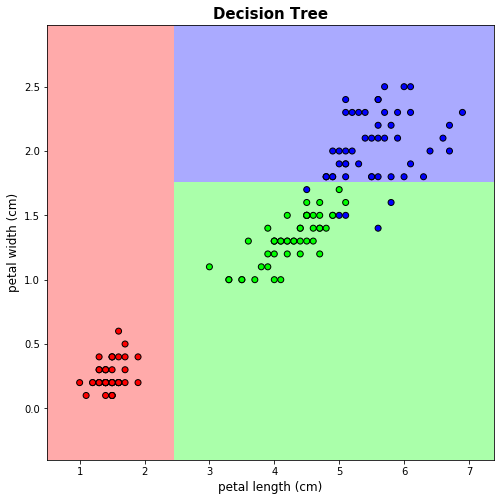

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as col

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
cmap_light = col.ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = col.ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

Z = tree_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(1, figsize=(8, 8))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=cmap_bold)
plt.xlabel(iris["feature_names"][2], fontsize=12)
plt.ylabel(iris["feature_names"][3], fontsize=12)
plt.title("Decision Tree", fontsize=15, fontweight="bold")
plt.show()

In [6]:
from sklearn.tree import DecisionTreeClassifier

X = iris.data 
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=4).fit(X, y)


export_graphviz(
        tree_clf,
        out_file="iris_tree3.dot",
        feature_names=iris.feature_names,
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

!dot -Tpng iris_tree3.dot -o iris_tree3.png

Fontconfig warning: ignoring UTF-8: not a valid region tag


![Classification Tree](iris_tree3.png)

# Tree-based Classifiers

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as col

DataX = pd.read_csv("mixture.csv", index_col = [0])
cmap_light = col.ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = col.ListedColormap(['#FF0000', '#00FF00'])
X = DataX.iloc[:,:2].values 
y = DataX.iloc[:,2:].values
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Accuracy: 0.875


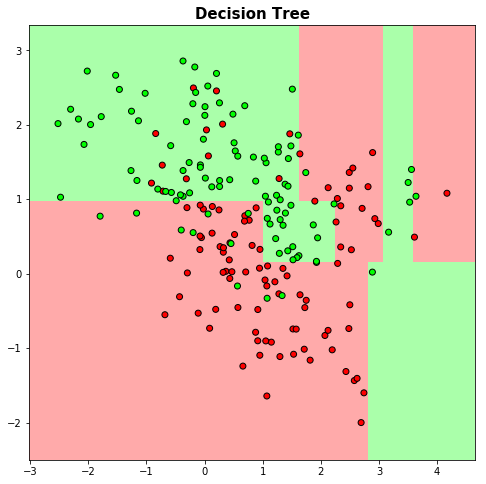

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

tree_clf = DecisionTreeClassifier(max_depth=4).fit(X, y)
print("Accuracy:", accuracy_score(y, tree_clf.predict(X)))

Z = tree_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(1, figsize=(8, 8))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X[:, 0:1], X[:, 1:2], c=y, edgecolors='k', cmap=cmap_bold)
plt.title("Decision Tree", fontsize=15, fontweight="bold")
plt.show()

Training Accuracy: 0.93
OOB Accuracy: 0.825


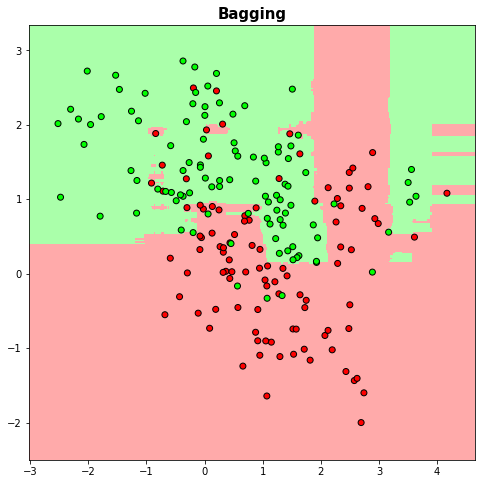

In [9]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(n_estimators=300, max_samples=100, oob_score=True)
bag_clf.fit(X, y)
print("Training Accuracy:", accuracy_score(y, bag_clf.predict(X)))
print("OOB Accuracy:", bag_clf.oob_score_)

Z = bag_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(1, figsize=(8, 8))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X[:, 0:1], X[:, 1:2], c=y, edgecolors='k', cmap=cmap_bold)
plt.title("Bagging", fontsize=15, fontweight="bold")
plt.show()

Training Accuracy: 1.0
OOB Accuracy: 0.825


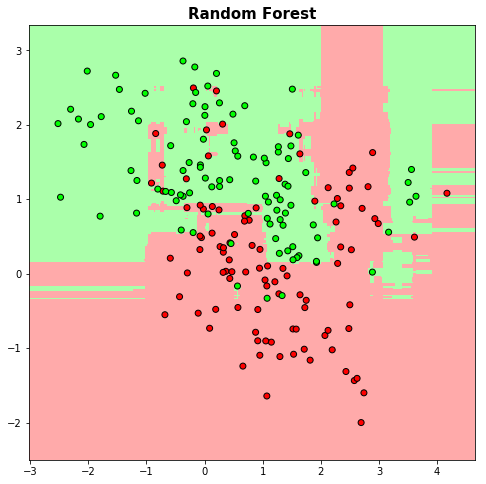

In [10]:
from sklearn.ensemble import RandomForestClassifier

RF_clf = RandomForestClassifier(n_estimators=300, oob_score=True)
RF_clf.fit(X,y)
print("Training Accuracy:", accuracy_score(y, RF_clf.predict(X)))
print("OOB Accuracy:", RF_clf.oob_score_)

Z = RF_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(1, figsize=(8, 8))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X[:, 0:1], X[:, 1:2], c=y, edgecolors='k', cmap=cmap_bold)
plt.title("Random Forest", fontsize=15, fontweight="bold")
plt.show()

Training Accuracy: 0.955


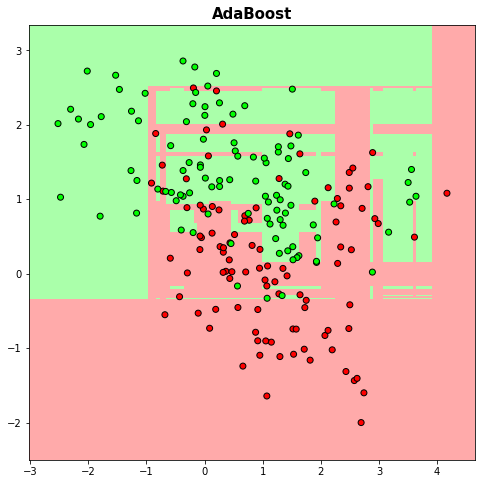

In [11]:
from sklearn.ensemble import AdaBoostClassifier

AdaBoost_clf = AdaBoostClassifier(n_estimators=300, learning_rate=0.5)
AdaBoost_clf.fit(X, y)

print("Training Accuracy:", accuracy_score(y, AdaBoost_clf.predict(X)))

Z = AdaBoost_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(1, figsize=(8, 8))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X[:, 0:1], X[:, 1:2], c=y, edgecolors='k', cmap=cmap_bold)
plt.title("AdaBoost", fontsize=15, fontweight="bold")
plt.show()